78 (6, 2, 1)
74 (6, 2, 0)
72 (6, 1, 1)
70 (6, 0, 1)
68 (6, 1, 0)
68 (4, 3, 2)
66 (6, 0, 0)
66 (5, 2, 2)
64 (5, 3, 1)
60 (5, 3, 0)
60 (5, 1, 2)
60 (3, 3, 2)
58 (5, 0, 2)
56 (2, 3, 2)
54 (1, 3, 2)
53 (0, 3, 2)
50 (4, 2, 2)
48 (4, 3, 1)
46 (5, 2, 1)
44 (4, 3, 0)
44 (4, 1, 2)
42 (5, 2, 0)
42 (4, 0, 2)
42 (3, 2, 2)
40 (5, 1, 1)
40 (3, 3, 1)
38 (5, 0, 1)
38 (2, 2, 2)
36 (5, 1, 0)
36 (3, 3, 0)
36 (3, 1, 2)
36 (2, 3, 1)
36 (1, 2, 2)
35 (0, 2, 2)
34 (5, 0, 0)
34 (3, 0, 2)
34 (1, 3, 1)
33 (0, 3, 1)
32 (2, 3, 0)
32 (2, 1, 2)
30 (4, 2, 1)
30 (2, 0, 2)
30 (1, 3, 0)
30 (1, 1, 2)
29 (0, 3, 0)
29 (0, 1, 2)
28 (1, 0, 2)
27 (0, 0, 2)
26 (4, 2, 0)
24 (4, 1, 1)
22 (4, 0, 1)
22 (3, 2, 1)
20 (4, 1, 0)
18 (4, 0, 0)
18 (3, 2, 0)
18 (2, 2, 1)
16 (3, 1, 1)
16 (1, 2, 1)
15 (0, 2, 1)
14 (3, 0, 1)
14 (2, 2, 0)
12 (3, 1, 0)
12 (2, 1, 1)
12 (1, 2, 0)
11 (0, 2, 0)
10 (3, 0, 0)
10 (2, 0, 1)
10 (1, 1, 1)
9 (0, 1, 1)
8 (2, 1, 0)
8 (1, 0, 1)
7 (0, 0, 1)
6 (2, 0, 0)
6 (1, 1, 0)
5 (0, 1, 0)
4 (1, 0, 0)
3 (0, 0, 0)


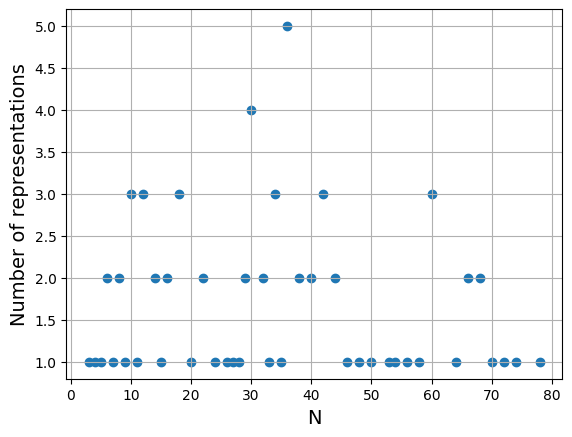

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math

#code for figure one- finding number of representations for every possible N

def numrep(N_):
    NON = defaultdict(int)
    results=[]
    # find max exponents automatically
    max_a = int(math.log(N_, 2)) + 1
    max_b = int(math.log(N_, 3)) + 1
    max_c = int(math.log(N_, 5)) + 1

#N for every possible representation
    for a in range(max_a + 1):
        for b in range(max_b + 1):
            for c in range(max_c + 1):
                N = 2**a + 3**b + 5**c
                pair= (a,b,c)
                if N <= N_:
                    NON[N] += 1    #adding to counter

                    results.append((N,pair))
    results.sort(reverse=True)   #putting numbers in order

    for N,pair in results:
      print(N,pair)


    return NON

#plotting for a max N
def plot_numrep(N_max=500):
    NON = numrep(N_max)

    x = sorted(NON.keys())
    y = [NON[n] for n in x]

    plt.scatter(x, y)
    plt.xlabel("N", fontsize=14)
    plt.ylabel("Number of representations", fontsize=14)
    plt.grid(True)
    plt.savefig('numrep.pdf')
    plt.show()

plot_numrep(80)


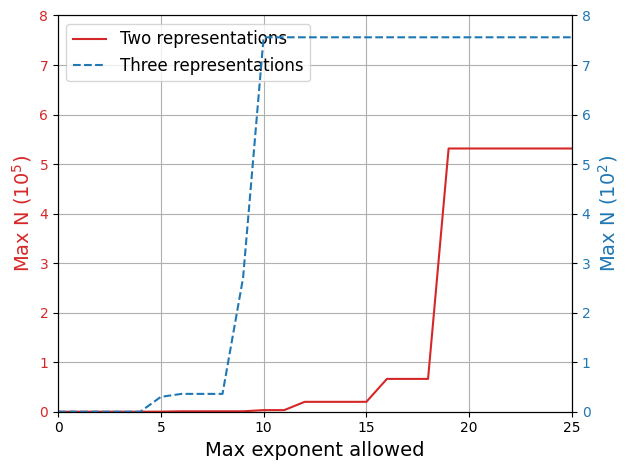

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


#code for max N for different values of the limit of a,b,c
#code for figure 2

#two reps a,b,c
def tworeps(limit):
  #creating empty list for each variable
    results = defaultdict(list)
    max_N = None
    pair= None

#cycling through all possible values of a,b,c and crosschecking them with the previous
    for a in range(limit+1):

        for b in range(limit+1):

            for c in range(limit+1):
                N = 2**a + 3**b + 5**c

                # Compare only with previous triples for this N
                for a1, b1, c1 in results[N]:
                    if a != a1 and b != b1 and c != c1:
                        if max_N is None or N > max_N:
                            max_N = N
                            pair= ((a,b,c),(a1,b1,c1))
                        break  # no need to check more

                results[N].append((a, b, c))

    return max_N



limits=np.arange(0,50,1)

#collect two reps data
yvals=[]

for i in limits:
  y=tworeps(i)
  yvals.append(y)

yvals_scaled  = [0 if v is None else v/100000 for v in yvals]  #scaling y to fit both axis


#function to check each individual component of the triples to compare
def distinct(triples):
  for rep1,rep2 in combinations(triples,2):
    if any(x==y for x,y in zip(rep1,rep2)):
      return False
  return True



#three reps a,b,c

def threereps(limit):
    results = defaultdict(list)
    max_N = None
    triple= None

    for a in range(limit):

        for b in range(limit):

            for c in range(limit):
                N = (2**a) + (3**b) + (5**c)

                results[N].append((a,b,c))

    for N, triples in results.items():
      if len(triples) >= 3:

        for combo in combinations(triples,3):   #checking current triple with previous and discarding if they equal the same N
          if distinct(combo):
            if max_N is None or N > max_N:
              max_N = N
              triple = combo

    return max_N


#collecting three reps data

yvals3=[]

for i in limits:
  y3=threereps(i)
  yvals3.append(y3)

yvals3_scaled = [0 if v is None else v/100 for v in yvals3]   #scaling

#plotting two plots on same graph
fig,ax1=plt.subplots()



ax1.set_xlabel('Max exponent allowed', fontsize=14)
ax1.set_xlim(0,25)
ax1.set_ylabel('Max N $(10^5)$',color='tab:red', fontsize=14)
ax1.plot(limits, yvals_scaled,color='tab:red', label='Two representations')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(0,8.0)
plt.grid(True)

ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('Max N $(10^2)$',color='tab:blue', fontsize=14)

ax2.plot(limits,yvals3_scaled,color='tab:blue',linestyle='dashed', label='Three representations')

ax2.set_ylim(0,8)
ax2.tick_params(axis='y', labelcolor='tab:blue')



lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

fig.tight_layout()


plt.savefig('abc.pdf')
plt.show()













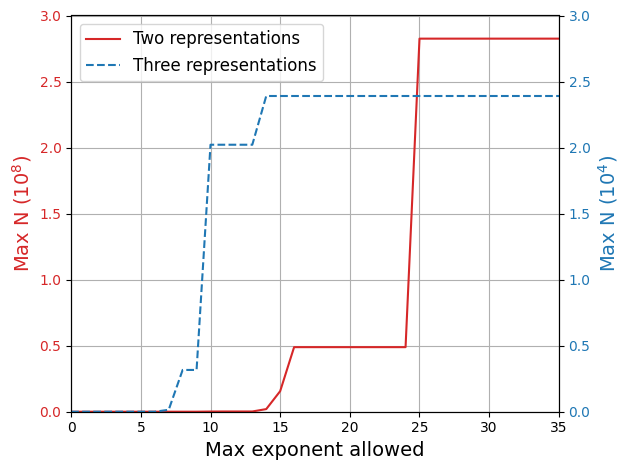

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

#code for figure 3 (a,b,c,d)


#two reps a,b,c,d

def tworeps(limit):
    results = defaultdict(list)
    max_N = None
    pair= None

    for a in range(limit+1):

        for b in range(limit+1):

            for c in range(limit+1):

              for d in range(limit+1):
                  N = 2**a + 3**b + 5**c +7**d

                  # Compare only with previous triples for this N
                  for a1, b1, c1, d1 in results[N]:
                      if a != a1 and b != b1 and c != c1 and d != d1:
                          if max_N is None or N > max_N:
                              max_N = N
                              pair= ((a,b,c,d),(a1,b1,c1,d1))
                          break  # no need to check more

                  results[N].append((a, b, c,d))

    return max_N



limits=np.arange(0,37,1)
#collecting data for two reps
yvals=[]

for i in limits:
  y=tworeps(i)
  yvals.append(y)

yvals_scaled = [0 if v is None else v/100000000 for v in yvals]  #scaling



#same as above
def distinct(triples):
  for rep1,rep2 in combinations(triples,2):
    if any(x==y for x,y in zip(rep1,rep2)):
      return False
  return True



def threereps(limit):
    results = defaultdict(list)
    max_N = None
    triple= None

    for a in range(limit):

        for b in range(limit):

            for c in range(limit):

              for d in range(limit):
                  N = (2**a) + (3**b) + (5**c)+(7**d)

                  results[N].append((a,b,c,d))

    for N, triples in results.items():
      if len(triples) >= 3:

        for combo in combinations(triples,3):
          if distinct(combo):
            if max_N is None or N > max_N:
              max_N = N
              triple = combo

    return max_N


#collecting data for three reps

yvals3=[]

for i in limits:
  y3=threereps(i)
  yvals3.append(y3)

yvals3_scaled = [0 if v is None else v/10000 for v in yvals3]   #scaling



#plotting both plots on the same graph

fig,ax1=plt.subplots()

color='tab:red'
ax1.set_xlabel('Max exponent allowed', fontsize=14)
ax1.set_xlim(0,35)
ax1.set_ylabel('Max N $(10^8)$',color=color, fontsize=14)
ax1.plot(limits, yvals_scaled,color=color, label='Two representations')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,3)
plt.grid(True)

ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('Max N $(10^4)$',color=color, fontsize=14)

ax2.plot(limits,yvals3_scaled,color=color,linestyle='dashed', label='Three representations')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,3)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

fig.tight_layout()
plt.savefig('abcd.pdf')
plt.show()

